# scikit-learnで決定木分析（CART法）

決定木分析は、決定木と呼ばれる、木を逆にしたようなデータ構造を用いて分類と回帰を行う。  
決定木分析は、ノンパラメトリックな教師あり学習に部類される。

## 決定木分析の長所


* 入力データから特徴を学習し、決定木と呼ばれる樹木状の構造で学習結果を視覚化でき、ルールをシンプルに表現できる
* 他の多くの手法では、データの標準化やダミー変数の作成を必要とするのに対して、決定木分析では、このような前処理の手間がほとんど不要
* カテゴリカルデータ（名義尺度の変数）と数値データ（順序尺度、間隔尺度の変数）の両方を扱うことができる
* 比較的ホワイトボックスのモデルなので、論理的に解釈することが容易
* 検定を行って、作成したモデルの正しさを評価することができる




引数はデフォルト値  
sklearn.tree.DecisionTreeClassifier(criterion='gini',
  splitter='best', max_depth=None, min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
  max_features=None, random_state=None,
  max_leaf_nodes=None, class_weight=None, presort=False)

## scikit-learnを用いた決定木の作成
scikit-learnに付属のデータセット、Irisを利用する。これはアヤメのがく片や花弁の幅、長さとそのアヤメの品種が150個体分記録されている。今回は、がく片や花弁の幅、長さを説明変数（教師データ）、アヤメの品種を目的変数（正解データ）として扱い、分類する決定木を作成。

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

# 説明変数（それぞれ、がく片や花弁の幅、長さを示す）
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# 目的変数（０、１、２がそれぞれの品種を表す）
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

scikit-learnにて決定木による分類が実装されているクラス、tree.DecisionTreeClassifierクラスのfitメソッドに、説明変数と目的変数を与え、モデルを作成する。

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)

# 作成したモデルを用いて予測を実行
predicted = clf.predict(iris.data)

# 予測結果
predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

予測された結果と実際の目的変数を比較し、識別率を計算。

In [6]:
sum(predicted == iris.target) / len(iris.target)

0.9733333333333334

## 決定木の可視化

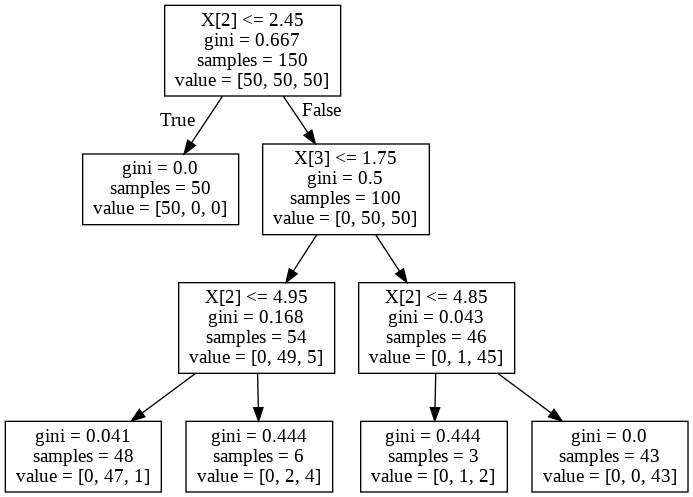

In [10]:
# 作成した決定木を可視化（pydotplusパッケージを利用）
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# ノートブックに可視化
from IPython.display import Image
Image(graph.create_png())